# Dubins Path Planning simulation results analyzer

This notebook is made to analyze the results produced by running the `DubinsFleetPlanner` on many test cases.

## Fetching data

In [2]:
# Import data manipulation libs

import pandas as pd
from pandas.core.groupby import DataFrameGroupBy
import numpy as np

In [3]:
# Select a source file

import io
import ipywidgets as widgets

uploader = widgets.FileUpload(
    accept='.csv',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

display(uploader)

FileUpload(value=(), accept='.csv', description='Upload')

In [4]:
uploaded_file = uploader.value[0]

data = pd.read_csv(io.BytesIO(uploaded_file.content),sep=';')
display(data)

,Test input,Iterations,Duration(ns),Threads,Possible paths,Initial guessed time,AC_Rows,AC_Num,is_formation,is_rng,Duration(ms),Successful
0,/home/mael/Programming/DubinsFleetPlanner/case...,7,320266198,12,26,100.176988,4,10,1,0,320.266198,1
1,/home/mael/Programming/DubinsFleetPlanner/case...,7,246894157,12,26,102.216725,4,10,1,0,246.894157,1
2,/home/mael/Programming/DubinsFleetPlanner/case...,14,115306635,12,26,74.342345,4,10,1,0,115.306635,1
3,/home/mael/Programming/DubinsFleetPlanner/case...,1,6846502,12,26,89.078682,4,10,1,0,6.846502,1
4,/home/mael/Programming/DubinsFleetPlanner/case...,14,557317515,12,26,101.511710,4,10,1,0,557.317515,1
...,...,...,...,...,...,...,...,...,...,...,...,...
94221,/home/mael/Programming/DubinsFleetPlanner/case...,7,85324617,12,26,106.950903,3,9,1,1,85.324617,1
94222,/home/mael/Programming/DubinsFleetPlanner/case...,14,251320810,12,26,103.163969,3,9,1,1,251.320810,1
94223,/home/mael/Programming/DubinsFleetPlanner/case...,11,119232688,12,26,102.028372,3,9,1,1,119.232688,1
94224,/home/mael/Programming/DubinsFleetPlanner/case...,11,138251367,12,26,52.894503,3,9,1,1,138.251367,1


In [5]:
data["Time per iteration (ms)"] = data["Duration(ms)"]/data["Iterations"]

In [6]:
ac_nums = data['AC_Num'].unique()
ac_nums.sort()
ac_nums

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20])

In [7]:
full_rng_data = data[(data['is_rng'] == 1) & (data['is_formation'] == 0) & (data['AC_Num'] > 2)]
full_formation_data = data[(data['is_rng'] == 0) & (data['is_formation'] == 1) & (data['AC_Num'] > 2)]
rng_to_formation_data = data[(data['is_rng'] == 1) & (data['is_formation'] == 1) & (data['AC_Num'] > 2)]

In [8]:
general_ac_grouped          = data.groupby(['AC_Num'])
full_rng_ac_grouped         = full_rng_data.groupby(['AC_Num'])
full_formation_ac_grouped   = full_formation_data.groupby(['AC_Num'])
rng_to_formation_ac_grouped = rng_to_formation_data.groupby(['AC_Num'])

print("Full RNG cases")
print(full_rng_ac_grouped["Test input"].count())

print("Formation cases")
print(full_formation_ac_grouped["Test input"].count())

print("RNG to formation cases")
print(rng_to_formation_ac_grouped["Test input"].count())

Full RNG cases
AC_Num
3     300
4     300
5     300
6     300
7     300
8     300
9     300
10    300
11    300
12    300
13    300
14    300
15    300
16    300
17    300
18    300
19    300
20    300
Name: Test input, dtype: int64
Formation cases
AC_Num
3     530
4     536
5     534
6     536
7     534
8     536
9     534
10    536
11    534
12    536
13    534
14    536
15    534
16    536
17    534
18    536
19    534
20    536
Name: Test input, dtype: int64
RNG to formation cases
AC_Num
3     4400
4     4400
5     4400
6     4400
7     4400
8     4400
9     4400
10    4400
11    4400
12    4400
13    4400
14    4400
15    4400
16    4400
17    4400
18    4400
19    4400
20    4400
Name: Test input, dtype: int64


## Plotting

In [9]:

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib import colormaps
import matplotlib
from matplotlib import ticker

print(matplotlib.__version__)

plt.rcParams['figure.figsize'] = [16, 9]

def clean_plot_borders(axe:Axes):
    for spine in axe.spines:
            axe.spines[spine].set_visible(False)


%matplotlib inline

3.10.8


### Success rate

/tmp/ipykernel_38322/253387461.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


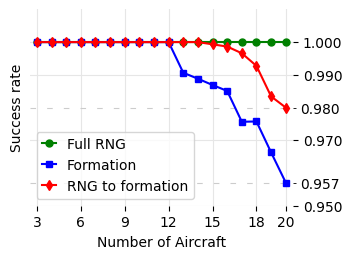

In [10]:
ieee_columnwidth = 3.4#16 #inches
figratio = 4/3#16/9#
ieee_figsize = (ieee_columnwidth,ieee_columnwidth/figratio)

ieee_textwidth = 7#16. #inches, double column
ieee_doublefigsize = (2*ieee_textwidth,2*ieee_textwidth/figratio)

fig,ax = plt.subplots(figsize=ieee_figsize)

# general_rate = general_ac_grouped[['Successful']].mean().rename(columns={'Successful':'General rate'})
full_rng_rate = full_rng_ac_grouped[['Successful']].mean().rename(columns={'Successful':'Full RNG'})
full_formation_rate = full_formation_ac_grouped[['Successful']].mean().rename(columns={'Successful':'Formation'})
rng_to_formation_rate = rng_to_formation_ac_grouped[['Successful']].mean().rename(columns={'Successful':'RNG to formation'})

# general_rate.plot(kind='line',ax=ax,color='k')
full_rng_rate.plot(kind='line',ax=ax,color='g',marker='o',markersize=5,linestyle='-')#(0,(5,5)))
full_formation_rate.plot(kind='line',ax=ax,color='b',marker='s',markersize=5,linestyle='-')#(0,(5,5)))
rng_to_formation_rate.plot(kind='line',ax=ax,color='r',marker='d',markersize=5,linestyle='-')#(0,(5,5)))

ax.grid(True,'major','y',linestyle='-',color='0.9')
ax.grid(True,'minor','y',linestyle=(0,(5,10)),color='0.8')
ax.grid(True,'major','x',linestyle='-',color='0.9')
ax.set_axisbelow(True)

ax.set_xlabel('Number of Aircraft')
ax.xaxis.set_major_locator(ticker.FixedLocator([3,6,9,12,15,18,20]))

min_success_rates = [full_rng_rate.min().iloc[0],
                    full_formation_rate.min().iloc[0],
                    rng_to_formation_rate.min().iloc[0]]

min_success_rate = min(min_success_rates)

left_ticks = [0.95,0.97,0.99,1.]
ax.set_xlim(2.5,20.5)
ax.yaxis.tick_right()
ax.set_ylim(min_success_rate,1.01)
ax.set_yticks(left_ticks)
ax.yaxis.set_minor_locator(ticker.FixedLocator(min_success_rates))
ax.yaxis.set_major_formatter(ticker.FuncFormatter("{:.3f}".format))
ax.yaxis.set_minor_formatter(ticker.FuncFormatter("{:.3f}".format))

# right_ax = ax.twinx()
# right_ax.tick_params(labelbottom=False)
# right_ax.set_ylim(min_success_rate,1.01)
# right_ax.yaxis.tick_right()
# right_ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator[[]])


ax.set_ylabel('Success rate')

clean_plot_borders(ax)
ax.legend(handlelength=1)
# ax.get_legend().remove()

fig.savefig("DubinsPP_SuccessRate.svg")
fig.show()

### Computation time

In [11]:
## Util functions


def extract_field_from_groups(grouped:DataFrameGroupBy,field:str) -> tuple[np.ndarray,list[np.ndarray]]:
    keys = []
    durations = []
    
    for n,group in grouped:
        keys.append(n)
        durations.append(group[field].to_numpy())
    
    return np.asarray(keys).flatten(),durations

def extract_durations_from_groups(grouped:DataFrameGroupBy) -> tuple[np.ndarray,list[np.ndarray]]:
    return extract_field_from_groups(grouped,'Duration(ms)')
    # keys = []
    # durations = []
    
    # for n,group in grouped:
    #     keys.append(n)
    #     durations.append(group['Duration(ms)'].to_numpy())
    
    # return np.asarray(keys).flatten(),durations

def extract_time_per_it_from_groups(grouped:DataFrameGroupBy) -> tuple[np.ndarray,list[np.ndarray]]:
    return extract_field_from_groups(grouped,"Time per iteration (ms)")
    # keys = []
    # durations = []
    
    # for n,group in grouped:
    #     keys.append(n)
    #     durations.append(group["Time per iteration (ms)"].to_numpy())
        
    # return np.asarray(keys).flatten(),durations
    
def extract_iterations_from_groups(grouped:DataFrameGroupBy) -> tuple[np.ndarray,list[np.ndarray]]:
    return extract_field_from_groups(grouped,"Iterations")
        

def extract_durations_depending_success(grouped:DataFrameGroupBy) -> tuple[np.ndarray,list[np.ndarray],list[np.ndarray]]:
    
    keys = []
    durations_success = []
    durations_failure = []
    
    for n,group in grouped:
        keys.append(n)
        
        success = group["Successful"] == 1
        failure = group["Successful"] == 0
        
        durations_success.append(group[success]['Duration(ms)'].to_numpy())
        durations_failure.append(group[failure]['Duration(ms)'].to_numpy())
    
    return np.asarray(keys).flatten(),durations_success,durations_failure

def get_percentiles(durations:list[np.ndarray],qpercentiles:list[int]) -> np.ndarray:
    values = np.zeros((len(durations),len(qpercentiles)))
    
    for i,a in enumerate(durations):
        for j,q in enumerate(qpercentiles):
            values[i,j] = np.percentile(a,q)
    
    return values

def get_statdata(durations:list[np.ndarray]) -> tuple[np.ndarray,np.ndarray,np.ndarray,np.ndarray]:
    mins    = np.zeros(len(durations))
    maxs    = np.zeros(len(durations))
    means   = np.zeros(len(durations))
    sigmas  = np.zeros(len(durations))
    
    for i,a in enumerate(durations):
        mins[i]     = np.min(a)
        maxs[i]     = np.max(a)
        means[i]    = np.mean(a)
        sigmas[i]   = np.std(a)
        
    return mins,maxs,means,sigmas

12417.1827485


/tmp/ipykernel_38322/441414515.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


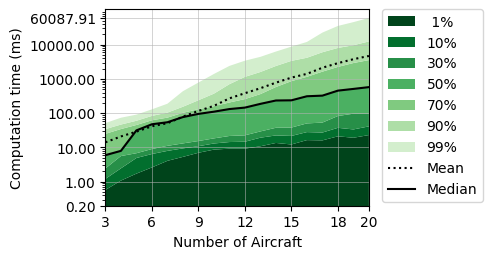

In [14]:
fig,ax = plt.subplots(figsize=ieee_figsize)

ac_nums,durations = extract_durations_from_groups(general_ac_grouped)

mins,maxs,means,sigmas = get_statdata(durations)

qpercentiles = [1,10,30,50,70,90,99]

percentiles = get_percentiles(durations,qpercentiles)
print(percentiles[-1,-2])
medians = percentiles[:,3]

diff_percentiles = np.diff(percentiles,prepend=0)

cmap = colormaps['Greens_r']
# cmap = colormaps['gray']
colors = cmap(np.linspace(0,0.8,len(qpercentiles)))

ax.stackplot(ac_nums,diff_percentiles.T,
             baseline='zero',
             colors=colors,
             labels=["{:>2}%".format(q) for q in qpercentiles])

ax.plot(ac_nums,means,label='Mean',linestyle=':',color='k')
ax.plot(ac_nums,medians,label='Median',linestyle='-',color='k')


# ax.hlines([120000],0,22,linestyles='--',color='gray',label='Timeout')


ax.xaxis.set_major_locator(ticker.FixedLocator([3,6,9,12,15,18,20]))
ax.set_xlim(3,20)


ax.set_yscale('log')
ax.grid(axis='y',color='0.7',linewidth=0.4)
ax.grid(axis='x',color='0.7',linewidth=0.4)
ax.set_axisbelow('line')

ticks = ax.get_yticks()
max_val = np.max(percentiles)
yticks = [0.2,1.,10,100,1000,10000,max_val]
ax.set_yticks(yticks)

ax.yaxis.set_major_formatter(ticker.FuncFormatter("{:.2f}".format))

# ax.set_title('Computation time percentiles as function of the number of aircraft')
ax.set_ylabel('Computation time (ms)')
ax.set_xlabel('Number of Aircraft')
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

fig.savefig("DubinsPP_ComputationTime.svg")
fig.show()

/tmp/ipykernel_14698/3641964336.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


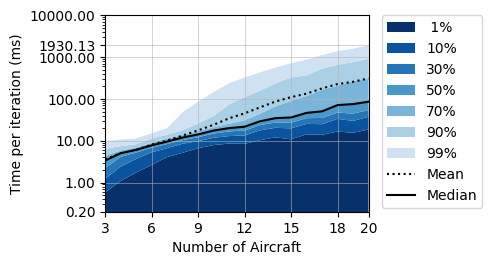

In [24]:
fig,ax = plt.subplots(figsize=ieee_figsize)

ac_nums,time_per_it = extract_time_per_it_from_groups(general_ac_grouped)

mins,maxs,means,sigmas = get_statdata(time_per_it)

qpercentiles = [1,10,30,50,70,90,99]

percentiles = get_percentiles(time_per_it,qpercentiles)
medians = percentiles[:,3]

diff_percentiles = np.diff(percentiles,prepend=0)

cmap = colormaps['Blues_r']
# cmap = colormaps['gray']
colors = cmap(np.linspace(0,0.8,len(qpercentiles)))

ax.stackplot(ac_nums,diff_percentiles.T,
             baseline='zero',
             colors=colors,
             labels=["{:>2}%".format(q) for q in qpercentiles])

ax.plot(ac_nums,means,label='Mean',linestyle=':',color='k')
ax.plot(ac_nums,medians,label='Median',linestyle='-',color='k')


# ax.hlines([120000],0,22,linestyles='--',color='gray',label='Timeout')


ax.xaxis.set_major_locator(ticker.FixedLocator([3,6,9,12,15,18,20]))
ax.set_xlim(3,20)


ax.set_yscale('log')
ax.grid(axis='y',color='0.7',linewidth=0.4)
ax.grid(axis='x',color='0.7',linewidth=0.4)
ax.set_axisbelow('line')

ticks = ax.get_yticks()
max_val = np.max(percentiles)
yticks = [0.2,1.,10,100,1000,10000,max_val]
ax.set_yticks(yticks)

ax.yaxis.set_major_formatter(ticker.FuncFormatter("{:.2f}".format))

# ax.set_title('Computation time percentiles as function of the number of aircraft')
ax.set_ylabel('Time per iteration (ms)')
ax.set_xlabel('Number of Aircraft')
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

fig.savefig("DubinsPP_TimePerIteration.svg")
fig.show()

[23. 23. 22. 22. 25. 23. 26. 36. 34. 54. 87. 87. 87. 87. 87. 87. 87. 87.]


/tmp/ipykernel_14698/3123578101.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


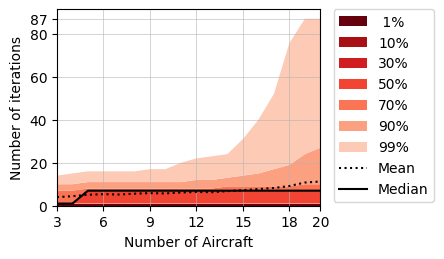

In [30]:
fig,ax = plt.subplots(figsize=ieee_figsize)

ac_nums,iterations = extract_iterations_from_groups(general_ac_grouped)

mins,maxs,means,sigmas = get_statdata(iterations)

print(maxs)

qpercentiles = [1,10,30,50,70,90,99]

percentiles = get_percentiles(iterations,qpercentiles)
medians = percentiles[:,3]

diff_percentiles = np.diff(percentiles,prepend=0)

cmap = colormaps['Reds_r']
# cmap = colormaps['gray']
colors = cmap(np.linspace(0,0.8,len(qpercentiles)))

ax.stackplot(ac_nums,diff_percentiles.T,
             baseline='zero',
             colors=colors,
             labels=["{:>2}%".format(q) for q in qpercentiles])

ax.plot(ac_nums,means,label='Mean',linestyle=':',color='k')
ax.plot(ac_nums,medians,label='Median',linestyle='-',color='k')


# ax.hlines([120000],0,22,linestyles='--',color='gray',label='Timeout')


ax.xaxis.set_major_locator(ticker.FixedLocator([3,6,9,12,15,18,20]))
ax.set_xlim(3,20)


# ax.set_yscale('log')
ax.grid(axis='y',color='0.7',linewidth=0.4)
ax.grid(axis='x',color='0.7',linewidth=0.4)
ax.set_axisbelow('line')

ticks = ax.get_yticks()
max_val = np.max(percentiles)
yticks = [0,20,40,60,80,max_val]
ax.set_yticks(yticks)

# ax.yaxis.set_major_formatter(ticker.FuncFormatter("{:.2f}".format))

# ax.set_title('Computation time percentiles as function of the number of aircraft')
ax.set_ylabel('Number of iterations')
ax.set_xlabel('Number of Aircraft')
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

# fig.savefig("DubinsPP_TimePerIteration.svg")
fig.show()

65716.214703


/tmp/ipykernel_11915/1474615890.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_11915/1474615890.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


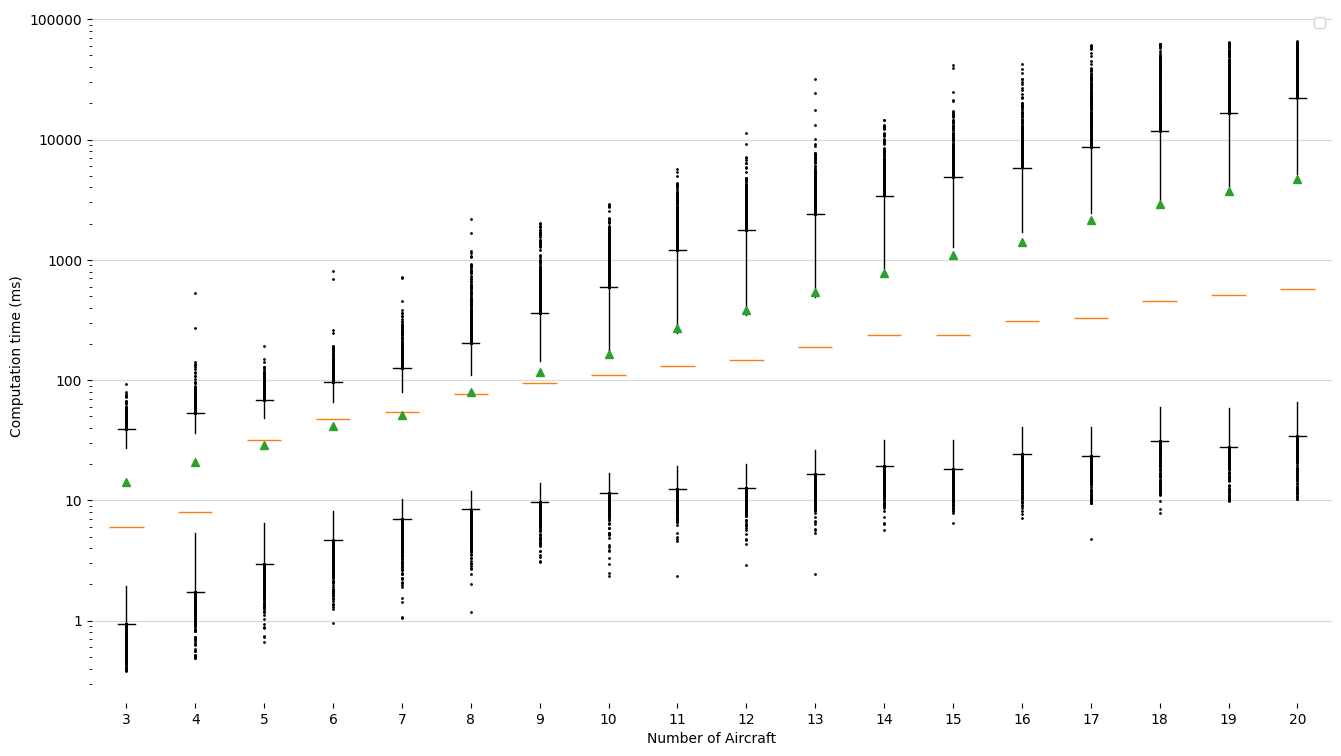

In [25]:
fig,ax = plt.subplots()

ax.boxplot(durations,whis=(5,95),sym='k.',positions=ac_nums,
           showbox=False,showmeans=True,flierprops={'markersize':2})

print(max(np.max(d) for d in durations))


ax.set_xlabel('Number of Aircraft')
ax.set_xticks(
    ac_nums,
    ac_nums
)
ax.set_xlim(2.5,20.5)

ax.set_ylabel('Computation time (ms)')
ax.set_yscale('log')
ax.grid(axis='y',color='0.85')
# ax.grid(axis='y',which='minor',color='0.9')
ax.set_axisbelow(True)

ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

clean_plot_borders(ax)
ax.legend()

fig.show()

87


/tmp/ipykernel_14698/1940464843.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_14698/1940464843.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


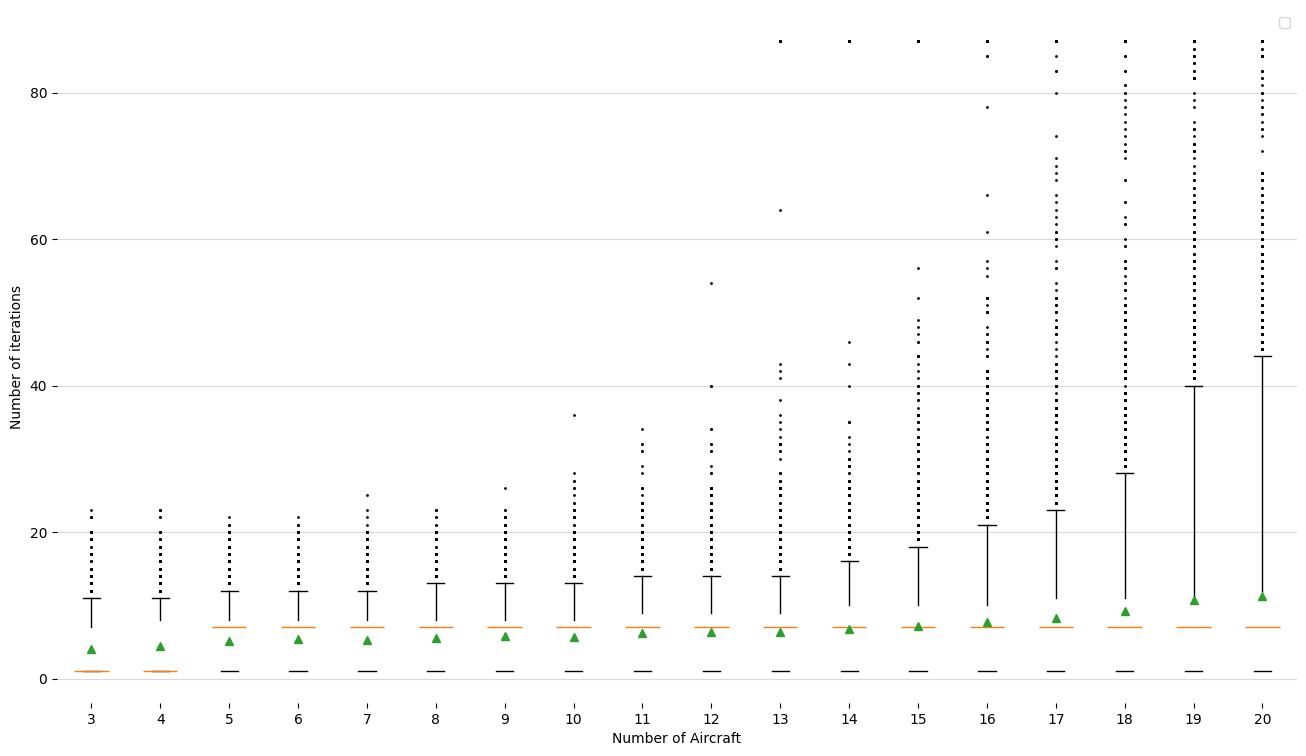

In [29]:
fig,ax = plt.subplots()

ax.boxplot(iterations,whis=(5,95),sym='k.',positions=ac_nums,
           showbox=False,showmeans=True,flierprops={'markersize':2})

print(max(np.max(d) for d in iterations))


ax.set_xlabel('Number of Aircraft')
ax.set_xticks(
    ac_nums,
    ac_nums
)
ax.set_xlim(2.5,20.5)

ax.set_ylabel('Number of iterations')
# ax.set_yscale('log')
ax.grid(axis='y',color='0.85')
# ax.grid(axis='y',which='minor',color='0.9')
ax.set_axisbelow(True)

ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

clean_plot_borders(ax)
ax.legend()

fig.show()

417.0701100133333 3877.529012964552 5065.030054919318


/tmp/ipykernel_11915/1328146141.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


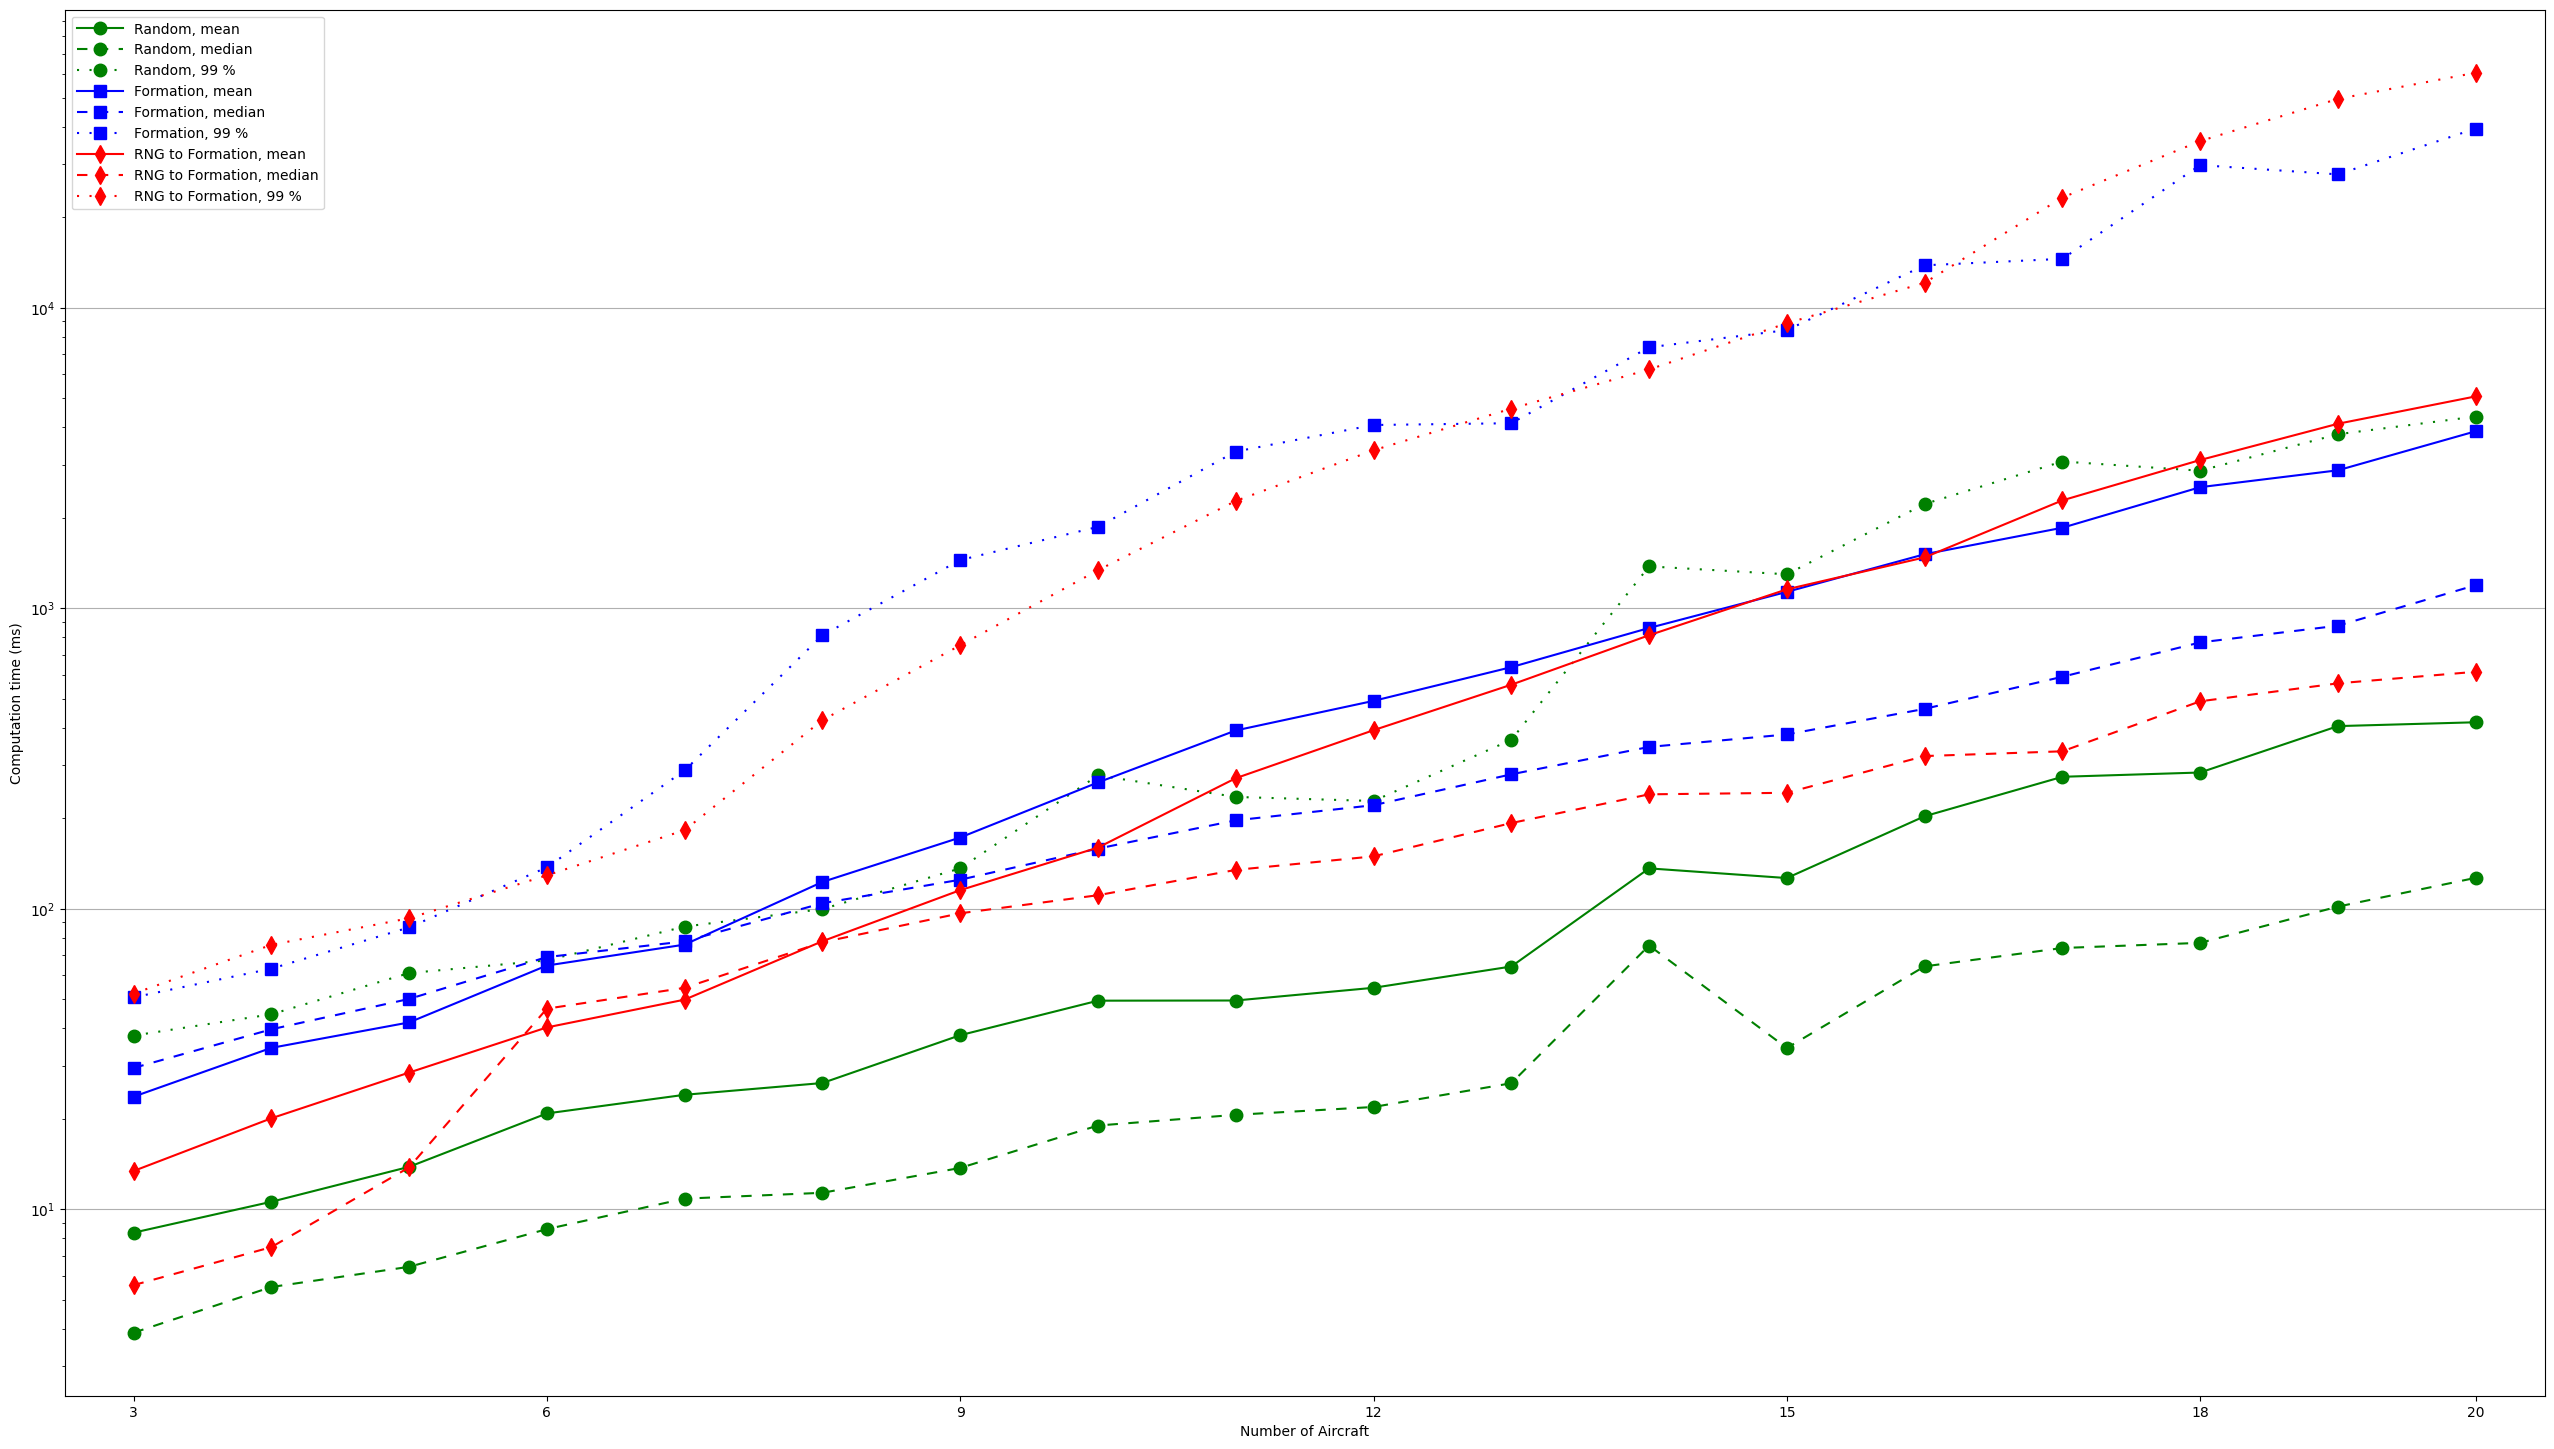

In [16]:
fig,ax = plt.subplots(figsize=ieee_doublefigsize)


ac_nums_rng,durations_rng                       = extract_durations_from_groups(full_rng_ac_grouped)
ac_nums_formation,durations_formation           = extract_durations_from_groups(full_formation_ac_grouped)
ac_nums_rng_formation,durations_rng_formation   = extract_durations_from_groups(rng_to_formation_ac_grouped)

_,maxs_rng,means_rng,_ = get_statdata(durations_rng)
_,maxs_formation,means_formation,_ = get_statdata(durations_formation)
_,maxs_rng_formation,means_rng_formation,_ = get_statdata(durations_rng_formation)

print(means_rng[-1],
means_formation[-1],
means_rng_formation[-1])

max_of_maxs_durations = max([np.max(maxs_rng),np.max(maxs_formation),np.max(maxs_rng_formation)])

qpercentiles = [5,10,30,50,70,90,95,99]

percentiles_rng = get_percentiles(durations_rng,qpercentiles)
medians_rng = percentiles_rng[:,3]
percentiles_formation = get_percentiles(durations_formation,qpercentiles)
medians_formation = percentiles_formation[:,3]
percentiles_rng_formation = get_percentiles(durations_rng_formation,qpercentiles)
medians_rng_formation = percentiles_rng_formation[:,3]

ax.plot(ac_nums_rng,means_rng               ,color='g', marker='o', markersize=9, linestyle='-',  label='Random, mean')
ax.plot(ac_nums_rng,medians_rng             ,color='g', marker='o', markersize=9, linestyle=(0,(5,5)), label='Random, median')
ax.plot(ac_nums_rng,percentiles_rng[:,-1]   ,color='g', marker='o', markersize=9, linestyle=(0,(1,5)), label=f'Random, {qpercentiles[-1]} %')

ax.plot(ac_nums_formation,means_formation               ,color='b', marker='s', markersize=9, linestyle='-',  label='Formation, mean')
ax.plot(ac_nums_formation,medians_formation             ,color='b', marker='s', markersize=9, linestyle=(0,(5,5)), label='Formation, median')
ax.plot(ac_nums_formation,percentiles_formation[:,-1]   ,color='b', marker='s', markersize=9, linestyle=(0,(1,5)), label=f'Formation, {qpercentiles[-1]} %')

ax.plot(ac_nums_rng_formation,means_rng_formation               ,color='r', marker='d', markersize=9, linestyle='-',  label='RNG to Formation, mean')
ax.plot(ac_nums_rng_formation,medians_rng_formation             ,color='r', marker='d', markersize=9, linestyle=(0,(5,5)), label='RNG to Formation, median')
ax.plot(ac_nums_rng_formation,percentiles_rng_formation[:,-1]   ,color='r', marker='d', markersize=9, linestyle=(0,(1,5)), label=f'RNG to Formation, {qpercentiles[-1]} %')

ax.set_xlabel('Number of Aircraft')
ax.xaxis.set_major_locator(ticker.FixedLocator([3,6,9,12,15,18,20]))
ax.set_xlim(2.5,20.5)

ax.set_ylabel('Computation time (ms)')
ax.set_yscale('log')
ax.grid(axis='y')
ax.set_axisbelow('line')

ax.legend(numpoints=1,handlelength=3.3)
# ,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

fig.savefig("DubinPP_ComputationTime_perCasetype.svg")
fig.show()

/tmp/ipykernel_11915/4065883582.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


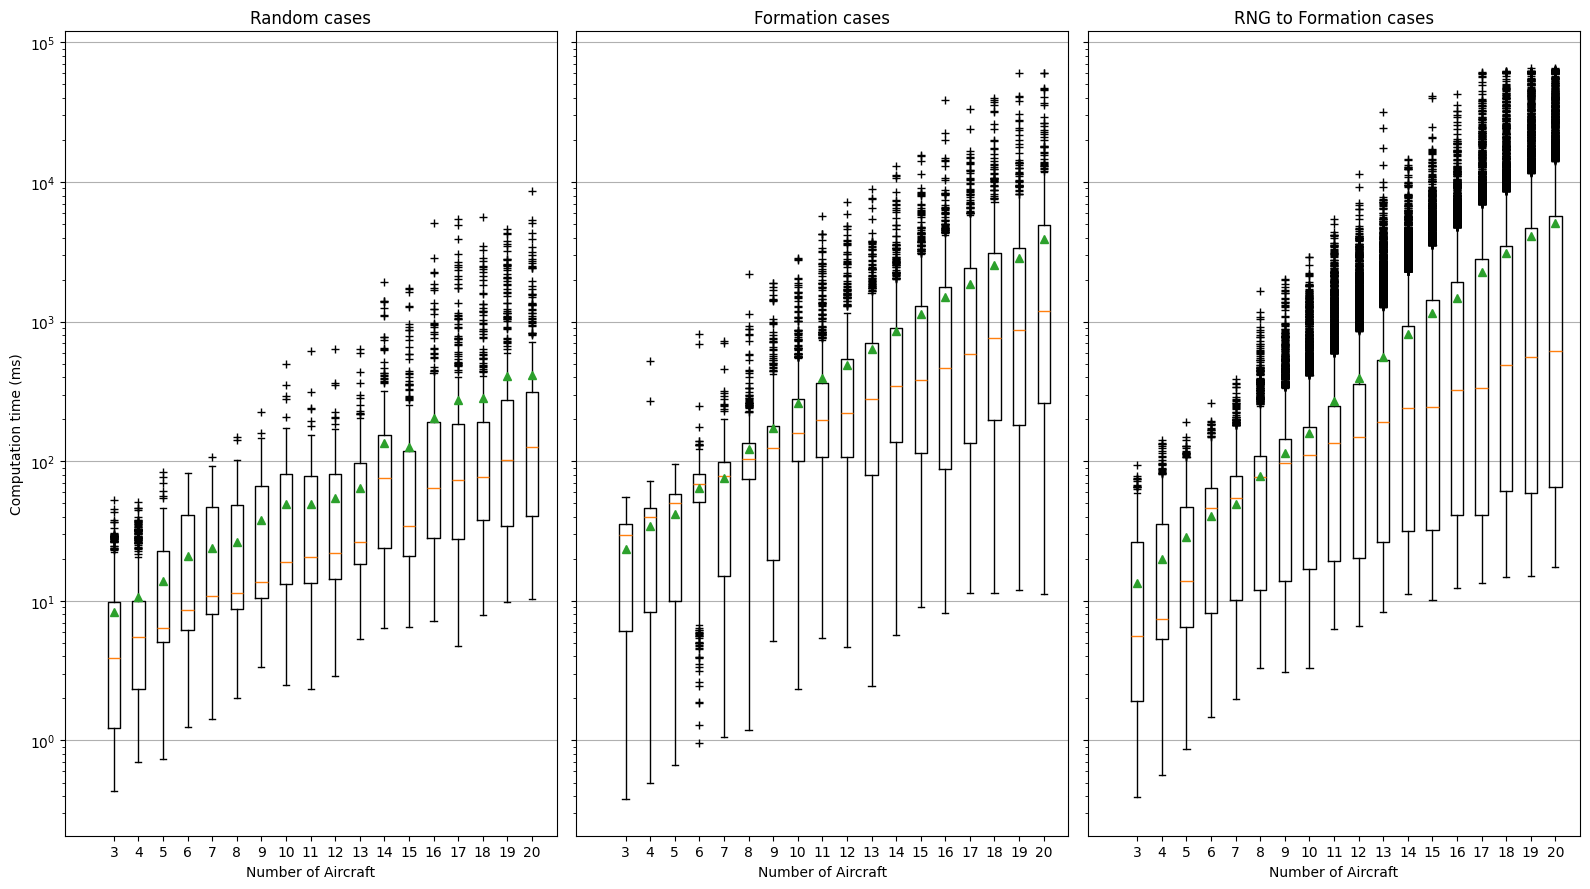

In [17]:
fig,axes = plt.subplots(1,3,sharey=True,sharex=True)


axes[0].boxplot(durations_rng,showmeans=True,sym='k+'           ,positions=ac_nums_rng)
axes[0].set_title("Random cases")
axes[1].boxplot(durations_formation,showmeans=True,sym='k+'     ,positions=ac_nums_formation)
axes[1].set_title("Formation cases")
axes[2].boxplot(durations_rng_formation,showmeans=True,sym='k+' ,positions=ac_nums_rng_formation)
axes[2].set_title("RNG to Formation cases")

# ax.hlines([120000],0,22,linestyles=':',color='k',label='Timeout')

for i,ax in enumerate(axes):
    ax.set_xlabel('Number of Aircraft')
    ax.set_xticks(
        ac_nums,
        ac_nums
    )
    ax.set_xlim(1,21)

    if i == 0:
        ax.set_ylabel('Computation time (ms)')
    ax.set_yscale('log')
    ax.grid(axis='y')
    ax.set_axisbelow('line')
    # ax.set_yticks(np.arange(0,max_of_maxs_durations,5000).tolist() + [max_of_maxs_durations])

fig.tight_layout()
fig.show()

/tmp/ipykernel_11915/2348030925.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


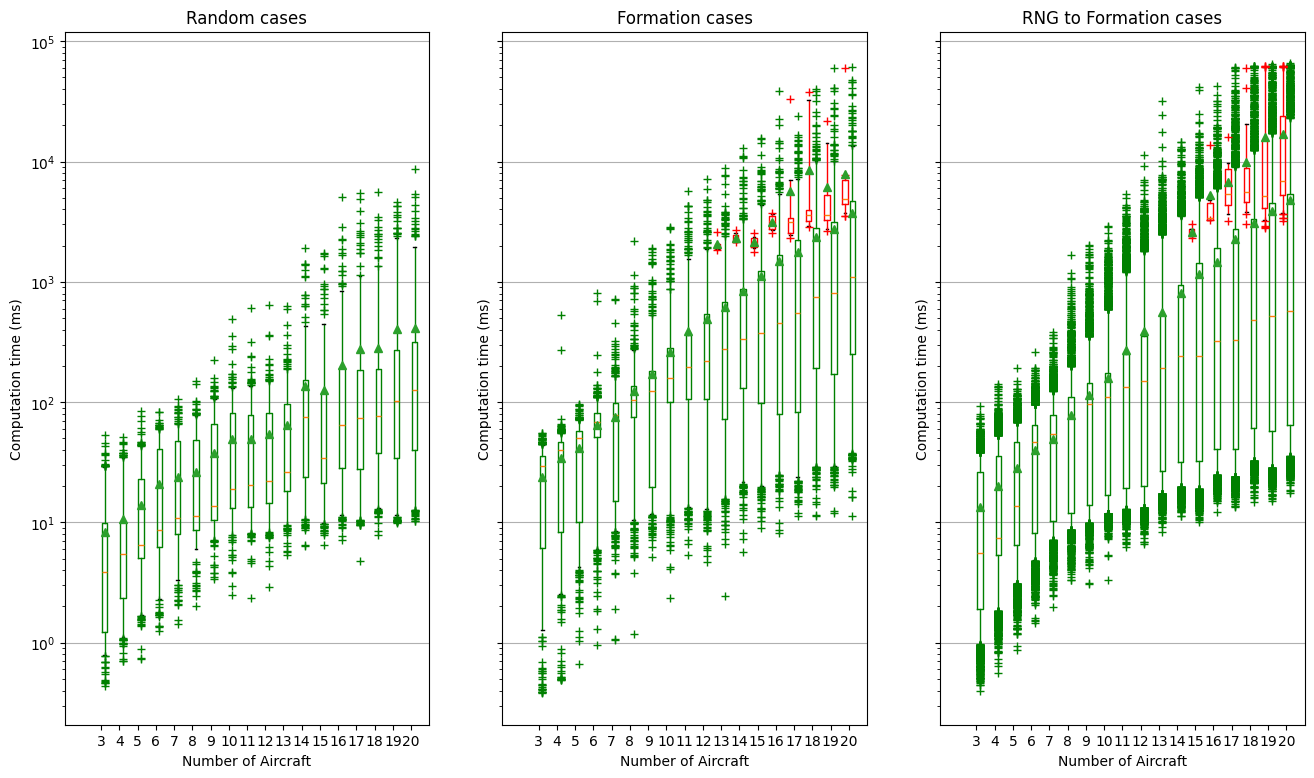

In [18]:
fig,axes = plt.subplots(1,3,sharey=True,sharex=True)


whiskerprops_success    = {"color":"green"}
boxprops_success        = {"color":"green"}
flierprops_success       = {"color":"green"}

whiskerprops_failure    = {"color":"red"}
boxprops_failure        = {"color":"red"}
flierprops_failure       = {"color":"red"}


ac_nums_rng,durations_rng_success,durations_rng_failure                                 = extract_durations_depending_success(full_rng_ac_grouped)
ac_nums_formation,durations_formation_success,durations_formation_failure               = extract_durations_depending_success(full_formation_ac_grouped)
ac_nums_rng_formation,durations_rng_formation_success,durations_rng_formation_failure   = extract_durations_depending_success(rng_to_formation_ac_grouped)

axes[0].boxplot(durations_rng_success,showmeans=True,sym='g+'           ,positions=ac_nums_rng+0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_success,boxprops=boxprops_success,flierprops=flierprops_success)
axes[0].boxplot(durations_rng_failure,showmeans=True,sym='r+'           ,positions=ac_nums_rng-0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_failure,boxprops=boxprops_failure,flierprops=flierprops_failure)
axes[0].set_title("Random cases")
axes[1].boxplot(durations_formation_success,showmeans=True,sym='g+'     ,positions=ac_nums_formation+0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_success,boxprops=boxprops_success,flierprops=flierprops_success)
axes[1].boxplot(durations_formation_failure,showmeans=True,sym='r+'     ,positions=ac_nums_formation-0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_failure,boxprops=boxprops_failure,flierprops=flierprops_failure)
axes[1].set_title("Formation cases")
axes[2].boxplot(durations_rng_formation_success,showmeans=True,sym='g+' ,positions=ac_nums_rng_formation+0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_success,boxprops=boxprops_success,flierprops=flierprops_success)
axes[2].boxplot(durations_rng_formation_failure,showmeans=True,sym='r+' ,positions=ac_nums_rng_formation-0.2,widths=0.30,whis=(5,95),
    whiskerprops=whiskerprops_failure,boxprops=boxprops_failure,flierprops=flierprops_failure)
axes[2].set_title("RNG to Formation cases")

for ax in axes:
    ax.set_xlabel('Number of Aircraft')
    ax.set_xticks(
        ac_nums,
        ac_nums
    )
    ax.set_xlim(1,21)

    ax.set_ylabel('Computation time (ms)')
    ax.set_yscale('log')
    ax.grid(axis='y')
    ax.set_axisbelow('line')

fig.show()